# Import libraries

In [1]:
# ! pip install faker 

In [2]:
import pandas as pd
import numpy as np
import random
from faker import Faker
from datetime import datetime, timedelta
from uuid import uuid4
from tqdm import tqdm
from random import randint, uniform
from faker.providers import BaseProvider
import warnings
warnings.simplefilter('ignore')

In [3]:
fake = Faker()
start_date = datetime.strptime("2005-01-01", "%Y-%m-%d")
end_date = datetime.strptime("2023-12-31", "%Y-%m-%d")

In [4]:
def generate_random_id():
    return(uuid4().hex)

# Data generation

## Region

In [5]:
world = pd.read_csv("../Data/worldcities.csv")
cameroon_cities = world[world['country']=='Cameroon']
gabon_cities = world[world['country']=='Gabon'].iloc[:5]
nigeria_cities = world[world['country']=='Nigeria'].iloc[:10]
cities = pd.concat([cameroon_cities, gabon_cities])
cities = pd.concat([cities, nigeria_cities])
print(cities.country.nunique())
print(cities.shape)
cities.head()

3
(102, 11)


,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
97,Douala,Douala,4.0500,9.7000,Cameroon,CM,CMR,Littoral,admin,5768400.0,1120494607
333,Yaoundé,Yaounde,3.8667,11.5167,Cameroon,CM,CMR,Centre,primary,2440462.0,1120298240
417,Bamenda,Bamenda,5.9614,10.1517,Cameroon,CM,CMR,North-West,admin,2000000.0,1120909610
1249,Garoua,Garoua,9.3000,13.4000,Cameroon,CM,CMR,Nord,admin,600000.0,1120803808
1250,Bafoussam,Bafoussam,5.4667,10.4167,Cameroon,CM,CMR,Ouest,admin,600000.0,1120435460


#### city repartition

In [6]:
# les villes les plus peuplés doivent avoir le plus de transaction

city_top5 = cameroon_cities.head(5)
city_top10 = cameroon_cities.head(10)

## Customer data

In [7]:
from random import randint, uniform
from faker.providers import BaseProvider

class CameroonPhoneProvider(BaseProvider):
    def phone_number(self):
        """Generates a fake Cameroon phone number in a random format."""
        formats = [
            "+237 65ABCDEFG",
            "+237 67ABCDEFG",
            "+237 68ABCDEFG",
            "+237 69ABCDEFG",
        ]
        format_str = formats[randint(0, len(formats) - 1)]
        phone_number = format_str.replace("A", str(randint(0, 9)))
        phone_number = phone_number.replace("B", str(randint(0, 9)))
        phone_number = phone_number.replace("C", str(randint(0, 9)))
        phone_number = phone_number.replace("D", str(randint(0, 9)))
        phone_number = phone_number.replace("E", str(randint(0, 9)))
        phone_number = phone_number.replace("F", str(randint(0, 9)))
        phone_number = phone_number.replace("G", str(randint(0, 9)))
        return phone_number

fake = Faker()
fake.add_provider(CameroonPhoneProvider)

cam_phone_number = fake.phone_number()
print(cam_phone_number)

+237 689020442


In [8]:
# création de la première partie du dataFrame avant d'ajouter la répartition selon les villes
customers_list = []
for i in tqdm(range(10000)):
    first_name = fake.first_name()
    last_name = fake.last_name()
    domain = fake.domain_name()
    email = f"{first_name}.{last_name}@{domain}"
    phone_number = cam_phone_number
    registration_date = fake.date_between(start_date, end_date)
    date_of_birth = fake.date_of_birth(minimum_age=30, maximum_age=75)
    address = fake.address()

    data_dict = {
        'customer_id' :generate_random_id(), 
        'first_name': first_name, 
        'last_name': last_name,
        'email': email,
        'phone_number': phone_number,
        'registration_date': registration_date,
        'date_of_birth' : date_of_birth,
        'address': address,
        }
    customers_list.append(data_dict)
customer_df = pd.DataFrame(customers_list)
print(customer_df.shape)

100%|██████████| 10000/10000 [00:19<00:00, 513.85it/s]

(10000, 8)


In [9]:
# scinder le df pour attribuer le plus de population aux grandes villes
customer_df_1 = customer_df.iloc[:4000]
customer_df_2 = customer_df.iloc[4000:7000].reset_index().drop(columns="index")
customer_df_3 = customer_df.iloc[7000:].reset_index().drop(columns="index")

In [10]:
city_1_list = []
for cust in customer_df_1.iterrows():
    city_1 = random.choice(list(city_top5.city))
    city_1_dict = {
        'city': city_1,
        'region' : cameroon_cities[cameroon_cities.city == city_1]['admin_name'].iloc[0]
    }
    city_1_list.append(city_1_dict)
customer_df_1[["city", "region"]] = pd.DataFrame(city_1_list)
customer_df_1.head()


,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,7af158b067d44bb4ae2cdf2f89e04492,Rebecca,Moore,Rebecca.Moore@clayton.org,+237 689020442,2010-02-08,1962-08-29,"61048 Hudson Plaza\nSouth Claudia, MD 30425",Douala,Littoral
1,e20b1bb45b2347788c9178d09f5eb613,Joshua,Oconnell,Joshua.Oconnell@ball.com,+237 689020442,2015-06-05,1963-05-03,"17762 Chad Lodge Suite 223\nThorntonview, ND 6...",Bamenda,North-West
2,9d66e5ed253a40618e8cbd6d7b004235,Dustin,Thomas,Dustin.Thomas@briggs-maldonado.info,+237 689020442,2007-05-09,1953-11-14,2096 Brian Junctions Suite 249\nNorth Reginabo...,Bafoussam,Ouest
3,f56a5aa54c0e4148b9e39e5d7632561e,William,Barnes,William.Barnes@gutierrez.net,+237 689020442,2015-06-05,1967-05-29,"5413 Mark Corners Suite 702\nDuffyton, MH 51109",Douala,Littoral
4,2acfd5ec2600445eae03a3ae89ea0101,Aaron,Vazquez,Aaron.Vazquez@chandler.com,+237 689020442,2022-02-17,1993-06-02,"69438 Davidson Mountain\nSouth Dennisborough, ...",Bafoussam,Ouest


In [11]:
city_2_list = []
for cust in customer_df_2.iterrows():
    city_2 = random.choice(list(city_top5.city))
    city_2_dict = {
        'city': city_2,
        'region' : cameroon_cities[cameroon_cities.city == city_2]['admin_name'].iloc[0]
    }
    city_2_list.append(city_2_dict)
customer_df_2[["city", "region"]] = pd.DataFrame(city_2_list)
customer_df_2.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,cc8731f252ad4322a0212c162e9bc89a,Melissa,Perry,Melissa.Perry@rush.com,+237 689020442,2010-01-06,1979-06-15,"4219 Rose Junction Apt. 969\nEast Reneeshire, ...",Garoua,Nord
1,a89d63b7abf64924824128c7d56edd12,Caitlin,Flynn,Caitlin.Flynn@trujillo.biz,+237 689020442,2009-12-05,1961-05-16,"2606 Kimberly Squares\nNorth Tara, UT 53571",Bamenda,North-West
2,8b483e22ee494160a101a5aca312770e,Kathy,Sparks,Kathy.Sparks@parrish.com,+237 689020442,2020-05-07,1973-05-15,"809 Stephanie Village\nTaylorfort, WV 05642",Yaoundé,Centre
3,2f3f94303d95465982cdd8d817ccd8fa,Cynthia,Moore,Cynthia.Moore@smith.com,+237 689020442,2023-11-06,1955-02-25,73351 Alexander Spring Suite 510\nKimberlyboro...,Bamenda,North-West
4,7838f0ec03504efa89c6caccec70d683,Kimberly,Thomas,Kimberly.Thomas@adams-ross.net,+237 689020442,2006-09-20,1951-05-14,"680 Wiley Inlet\nChristopherton, GA 24695",Douala,Littoral


In [12]:
city_3_list = []
for cust in customer_df_3.iterrows():
    city_3 = random.choice(list(cities.city))
    city_3_dict = {
        'city': city_3,
        'region' : cities[cities.city == city_3]['admin_name'].iloc[0]
    }
    city_3_list.append(city_3_dict)
customer_df_3[["city", "region"]] = pd.DataFrame(city_3_list)
customer_df_3.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,0319b9a3a8374003a6d47d23aaee7442,Melanie,Wolfe,Melanie.Wolfe@morgan.com,+237 689020442,2007-08-03,1959-02-06,"7156 Robert Road\nWest Cindyville, CA 55806",Douala,Littoral
1,1f473b13a9e0447c9f2bcb9ec00092e0,Amy,Contreras,Amy.Contreras@medina.com,+237 689020442,2014-06-09,1991-05-30,"39684 Allen Fall Apt. 236\nJacquelineland, MT ...",Kribi,Sud
2,a292f68844dd479aa6c22408fcb3ae6e,Kathleen,Sanchez,Kathleen.Sanchez@mcguire-cook.org,+237 689020442,2015-10-19,1992-01-22,70909 Russell Stravenue Suite 126\nPort Michae...,Kribi,Sud
3,68d09a0737974e68a47f1ce7b784eab7,Jessica,Levy,Jessica.Levy@crane.com,+237 689020442,2016-07-15,1985-02-01,Unit 7963 Box 1805\nDPO AP 55534,Bamessi,North-West
4,6fb675657119468a85fd4a33902aa564,Dalton,Maldonado,Dalton.Maldonado@salazar-hill.com,+237 689020442,2016-01-04,1971-01-01,"924 Lopez Extension\nSouth Regina, AK 02904",Maiduguri,Borno


In [13]:
customer_df_final = pd.concat([customer_df_1, customer_df_2, customer_df_3], axis=0)
customer_df_final.head()

,customer_id,first_name,last_name,email,phone_number,registration_date,date_of_birth,address,city,region
0,7af158b067d44bb4ae2cdf2f89e04492,Rebecca,Moore,Rebecca.Moore@clayton.org,+237 689020442,2010-02-08,1962-08-29,"61048 Hudson Plaza\nSouth Claudia, MD 30425",Douala,Littoral
1,e20b1bb45b2347788c9178d09f5eb613,Joshua,Oconnell,Joshua.Oconnell@ball.com,+237 689020442,2015-06-05,1963-05-03,"17762 Chad Lodge Suite 223\nThorntonview, ND 6...",Bamenda,North-West
2,9d66e5ed253a40618e8cbd6d7b004235,Dustin,Thomas,Dustin.Thomas@briggs-maldonado.info,+237 689020442,2007-05-09,1953-11-14,2096 Brian Junctions Suite 249\nNorth Reginabo...,Bafoussam,Ouest
3,f56a5aa54c0e4148b9e39e5d7632561e,William,Barnes,William.Barnes@gutierrez.net,+237 689020442,2015-06-05,1967-05-29,"5413 Mark Corners Suite 702\nDuffyton, MH 51109",Douala,Littoral
4,2acfd5ec2600445eae03a3ae89ea0101,Aaron,Vazquez,Aaron.Vazquez@chandler.com,+237 689020442,2022-02-17,1993-06-02,"69438 Davidson Mountain\nSouth Dennisborough, ...",Bafoussam,Ouest


In [14]:
customer_df_final.to_csv('../Data/Train/customers.csv', index=False)

## Device data

In [15]:

#creation de id

def create_id():
    return str(uuid4())

#creation des types d'appareils
def generate_device_type():
    return random.choice(['mobile', 'tablette'])

#creation des os

def generate_os():
    return random.choice(['android', 'ios', 'mac', 'windows', 'linux'])

#creation des fabricants
manufacturer_and_model={
                        'dell':['XPS 13', 'INSPIRON 15', 'LATITUDE 7410', 'PRECISION 5550'],
                        'HP': ['spectre x360', 'envy 13', 'pavillon 15', 'OMEN 15'],
                        'LG': ['spectre x3670', 'envy45','Gram 17', 'Wing 5G', ' NanoCell TV'],
                        'SONY':['Xperia 1 III', 'Xperia 5 II', 'Bravia OLDE', 'VAIO SX14'],
                        'Apple':['iphone 13', 'ipad pro', 'iphone Xr'],
                        'Sharp':['Aquos R6', 'aquos sense 5g', ' dynabook v8']
                        }
#def generate_manufacturer():
    #return random.choices(['dell', 'hp', 'lg', 'sony', 'apple', 'sharp', 'lenovo', 'acer', 'tecno','itel', 'huawei', 'samsung', 'google'])

#creation des modeles

def generate_model(type):
    return random.choice(manufacturer_and_model[type])

#creation de la table devices

def create_devices_table(lenght= 100000):

    devices= pd.DataFrame()

    # les listes
    device_id_list=[]
    devices_type_list=[]
    devices_manufacturer_list=[]
    devices_model_list=[]
    devices_last_used_list=[]
    devices_os_list=[]

    #generer les valeurs
    for i in tqdm(range(lenght)):
        devices_id=create_id()
        devices_type= generate_device_type()
        devices_last_used= fake.date_time_between(start_date= '-5y', end_date='now')
        devices_os= generate_os()
        devices_manufacturer= random.choice(list(manufacturer_and_model.keys()))
        devices_model= generate_model(devices_manufacturer)

        #ajout dans les listes
        device_id_list.append(devices_id)
        devices_type_list.append(devices_type)
        devices_model_list.append( devices_model)
        devices_manufacturer_list.append( devices_manufacturer)
        devices_last_used_list.append(devices_last_used)
        devices_os_list.append(devices_os)
        
     #assigner aux colonnes de la table devices
    devices['device_id']= device_id_list
    devices['device_type']= devices_type_list
    devices['os']= devices_os_list
    devices['manufacturer']= devices_manufacturer_list
    devices['model']= devices_model_list
    devices['last_used']= devices_last_used_list

    return devices

devices= create_devices_table()
devices

100%|██████████| 100000/100000 [00:10<00:00, 9981.05it/s]


,device_id,device_type,os,manufacturer,model,last_used
0,653bf724-8e76-4cf2-a8d7-c763a5aac2d5,mobile,windows,LG,spectre x3670,2019-09-01 14:30:59
1,716ab4b8-9c72-4000-acbb-cafed381dbca,mobile,ios,Apple,ipad pro,2023-06-26 11:16:18
2,e89b69f1-a731-40ef-bc34-a637d35971e0,tablette,android,Apple,ipad pro,2019-12-28 03:12:36
3,91f7b851-0831-402b-8559-e4b46b91da97,tablette,linux,HP,spectre x360,2020-10-10 06:37:07
4,f0cc91e9-e697-431b-bdc7-9de6b51c4488,tablette,linux,HP,OMEN 15,2023-11-14 22:45:26
...,...,...,...,...,...,...
99995,62a6ecb8-d1f2-425b-95c9-2e998eae4e78,tablette,linux,SONY,VAIO SX14,2024-02-20 03:32:16
99996,c7285755-0e0a-4963-8414-a25148742fc6,tablette,windows,SONY,Xperia 5 II,2021-08-25 03:29:11
99997,d6a964a0-72e5-4058-a984-228abb5974a9,tablette,android,LG,spectre x3670,2019-08-29 04:46:52
99998,d90f2298-4890-4301-b90f-52488b98893a,mobile,windows,SONY,Xperia 5 II,2023-03-15 11:15:58


In [16]:
devices.to_csv('../Data/Train/devices.csv', index=False)

## Transaction data

In [23]:
location_list = list(cities.city)
transaction_list=[]
customer_id_list = list(customer_df_final["customer_id"])

def is_fraud_trans(status):
    if status == "échouée":
        return 1
    # elif (amount >= 9500000 and transaction_type in ["depôt", "transfert"]) or (amount >= 10000000 and transaction_type == "retrait"):
    #     return 1
    else:
        return 0

for i in tqdm(range(100000)):
    transaction_id = generate_random_id()
    customer_id = random.choice(customer_id_list)
    transaction_type = random.choices(["retrait", "depôt", "transfert"], weights=[0.25, 0.5, 0.25])[0] # liste pondérée
    # amount = uniform(100, 10000000)
    transaction_date = fake.date_between(start_date, end_date)
    device_id = random.choice(list(devices["device_id"]))
    choices = ["échouée", "réussie"]
    poids = [0.1, 0.9]
    status = random.choices(choices, weights=poids)[0] # liste pondérée

    transaction_dict = {
        "transaction_id": transaction_id,
        "customer_id": customer_id,
        "device_id": device_id,
        "transaction_type": transaction_type,
        # "amount": amount,
        "transaction_date": transaction_date,
        "status": status,
        "is_fraud": is_fraud_trans(status)
    }

    transaction_list.append(transaction_dict)

transaction_df = pd.DataFrame(transaction_list)
print(transaction_df.shape)
transaction_df.head()

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [34:58<00:00, 47.66it/s]   


(100000, 7)


,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud
0,4c6230c741e6452b84ba044b3cd87bb8,cb6eae36cca1466da1cbb67f687f49c9,ed0e6498-a5a7-4ace-b9cb-8fac0e32b98d,retrait,2023-11-20,réussie,0
1,6eb908389940405b8e3bf41b8be76154,5c6966cb52db49febcd0cfb5ee79df0b,bcce4ada-42ba-4c79-9cb7-be7b7ef11533,depôt,2006-10-08,réussie,0
2,2ed0b7e182f74623a2a26e61d3173ae8,4367605200274c8794c83fe731d70ead,9f417868-e611-4253-a47d-7dda35e6db89,retrait,2020-08-22,réussie,0
3,c421355343864453a33a24d3604d5684,4060b6bd324245db810e5dbd21f90475,e30b5f20-aedd-46c2-8821-6108dea42cd4,retrait,2022-04-28,réussie,0
4,b4c08d429f3743638ca58377df6f4ed0,3f56a898bdf54a6c9dd19fb96a2a33f4,1f053555-4e33-486f-9165-5c714a51210a,transfert,2013-08-13,réussie,0


In [24]:
transaction_df_1 = transaction_df.iloc[:40000]
transaction_df_2 = transaction_df.iloc[40000:70000].reset_index().drop(columns="index")
transaction_df_3 = transaction_df.iloc[70000:].reset_index().drop(columns="index")

In [25]:
location_1_list = []
for trans in transaction_df_1.iterrows():
    location_1 = random.choice(list(city_top5.city))
    location_1_dict = {
        'location': location_1,
    }
    location_1_list.append(location_1_dict)
transaction_df_1[["location"]] = pd.DataFrame(location_1_list)
print(transaction_df_1.isna().sum())
print("\n------------------------------------------------\n")


transaction_id      0
customer_id         0
device_id           0
transaction_type    0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [26]:
location_2_list = []
for trans in transaction_df_2.iterrows():
    location_2 = random.choice(list(city_top10.city))
    location_2_dict = {
        'location': location_2,
    }
    location_2_list.append(location_2_dict)
transaction_df_2[["location"]] = pd.DataFrame(location_2_list)
print(transaction_df_2.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_type    0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [27]:
location_3_list = []
for trans in transaction_df_3.iterrows():
    location_3 = random.choice(list(cities.city))
    location_3_dict = {
        'location': location_3,
    }
    location_3_list.append(location_3_dict)
transaction_df_3[["location"]] = pd.DataFrame(location_3_list)
print(transaction_df_3.isna().sum())
print("\n------------------------------------------------\n")

transaction_id      0
customer_id         0
device_id           0
transaction_type    0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

------------------------------------------------



In [28]:
transaction_df_final = pd.concat([transaction_df_1, transaction_df_2, transaction_df_3])
transaction_df_final.shape 

(100000, 8)

In [29]:
transaction_df_final.isna().sum()

transaction_id      0
customer_id         0
device_id           0
transaction_type    0
transaction_date    0
status              0
is_fraud            0
location            0
dtype: int64

#### location_fraud

In [30]:
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['location'] not in list(cameroon_cities.city):
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

100000it [00:14, 6961.25it/s]


,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud,location
0,4c6230c741e6452b84ba044b3cd87bb8,cb6eae36cca1466da1cbb67f687f49c9,ed0e6498-a5a7-4ace-b9cb-8fac0e32b98d,retrait,2023-11-20,réussie,0,Bamenda
1,6eb908389940405b8e3bf41b8be76154,5c6966cb52db49febcd0cfb5ee79df0b,bcce4ada-42ba-4c79-9cb7-be7b7ef11533,depôt,2006-10-08,réussie,0,Bamenda
2,2ed0b7e182f74623a2a26e61d3173ae8,4367605200274c8794c83fe731d70ead,9f417868-e611-4253-a47d-7dda35e6db89,retrait,2020-08-22,réussie,0,Bamenda
3,c421355343864453a33a24d3604d5684,4060b6bd324245db810e5dbd21f90475,e30b5f20-aedd-46c2-8821-6108dea42cd4,retrait,2022-04-28,réussie,0,Bafoussam
4,b4c08d429f3743638ca58377df6f4ed0,3f56a898bdf54a6c9dd19fb96a2a33f4,1f053555-4e33-486f-9165-5c714a51210a,transfert,2013-08-13,réussie,0,Yaoundé


### device_fraud

In [31]:
selection = pd.DataFrame(transaction_df_final.device_id.value_counts()>=3).reset_index()
device_fraud = list(selection[selection['count']].device_id)
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['device_id'] in device_fraud:
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

100000it [01:08, 1461.97it/s]


,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud,location
0,4c6230c741e6452b84ba044b3cd87bb8,cb6eae36cca1466da1cbb67f687f49c9,ed0e6498-a5a7-4ace-b9cb-8fac0e32b98d,retrait,2023-11-20,réussie,0,Bamenda
1,6eb908389940405b8e3bf41b8be76154,5c6966cb52db49febcd0cfb5ee79df0b,bcce4ada-42ba-4c79-9cb7-be7b7ef11533,depôt,2006-10-08,réussie,1,Bamenda
2,2ed0b7e182f74623a2a26e61d3173ae8,4367605200274c8794c83fe731d70ead,9f417868-e611-4253-a47d-7dda35e6db89,retrait,2020-08-22,réussie,0,Bamenda
3,c421355343864453a33a24d3604d5684,4060b6bd324245db810e5dbd21f90475,e30b5f20-aedd-46c2-8821-6108dea42cd4,retrait,2022-04-28,réussie,1,Bafoussam
4,b4c08d429f3743638ca58377df6f4ed0,3f56a898bdf54a6c9dd19fb96a2a33f4,1f053555-4e33-486f-9165-5c714a51210a,transfert,2013-08-13,réussie,0,Yaoundé


In [51]:
lignes = transaction_df_final.to_numpy().tolist()
random.shuffle(lignes)
lignes[:5]

[['edde51a3fc2a4a4eb733d82dfa7ef1e0',
  '114d79213a1d4c7fa5ca46b821adcbf0',
  'acbf6432-7e94-47d9-b348-979fee7a02b3',
  'depôt',
  datetime.date(2005, 2, 12),
  'réussie',
  1,
  'Yagoua',
  862.3055473676916],
 ['7921a0cd009b4872929dc81b9bcc2789',
  '496687b96e6d435bb69e5e2c4274c614',
  '1603b8f4-6814-42cc-a757-74c485ab572b',
  'depôt',
  datetime.date(2021, 7, 20),
  'échouée',
  1,
  'Garoua',
  41868.91617164367],
 ['ffc077d8d3dd4db9b5b9ac4d98ce5747',
  'b5418a7d9bd844d2a3b33e22aa9e644a',
  'ea0ba924-e748-4845-af73-d1bf80b7b095',
  'depôt',
  datetime.date(2013, 10, 2),
  'réussie',
  0,
  'Nkongsamba',
  235269.4025275183],
 ['f4cc6f49b36b446784486116dee866c4',
  '66ae03d403a744e18b1b8698c7f2d9e2',
  'bba8a3a4-d971-4caa-914b-b80a5cd9579b',
  'depôt',
  datetime.date(2014, 6, 3),
  'réussie',
  0,
  'Ngou',
  57148.86159594465],
 ['9c37954010494aa7954eae6488878d4b',
  '685a2ca4610840f6a609d49c606e47b8',
  'baa4d08a-cb59-46df-ba90-73d1158493f6',
  'transfert',
  datetime.date(2014, 

In [52]:
df = pd.DataFrame(lignes, columns=transaction_df_final.columns)
transaction_df_1 = df.iloc[:70000]
transaction_df_2 = df.iloc[70000:95000].reset_index().drop(columns="index")
transaction_df_3 = df.iloc[95000:].reset_index().drop(columns="index")

list_transac_1 = []
for transac in transaction_df_1.iterrows():
    list_transac_1.append(uniform(100, 100000))
transaction_df_1["amount"] = list_transac_1

list_transac_2 = []
for transac in transaction_df_2.iterrows():
    list_transac_2.append(uniform(100000, 1000000))
transaction_df_2["amount"] = list_transac_2

list_transac_3 = []
for transac in transaction_df_3.iterrows():
    list_transac_3.append(uniform(1000000, 10000000))
transaction_df_3["amount"] = list_transac_3

In [53]:
transaction_df_final = pd.concat([transaction_df_1, transaction_df_2, transaction_df_3])
transaction_df_final.head()

,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud,location,amount
0,edde51a3fc2a4a4eb733d82dfa7ef1e0,114d79213a1d4c7fa5ca46b821adcbf0,acbf6432-7e94-47d9-b348-979fee7a02b3,depôt,2005-02-12,réussie,1,Yagoua,80175.613130
1,7921a0cd009b4872929dc81b9bcc2789,496687b96e6d435bb69e5e2c4274c614,1603b8f4-6814-42cc-a757-74c485ab572b,depôt,2021-07-20,échouée,1,Garoua,75642.607587
2,ffc077d8d3dd4db9b5b9ac4d98ce5747,b5418a7d9bd844d2a3b33e22aa9e644a,ea0ba924-e748-4845-af73-d1bf80b7b095,depôt,2013-10-02,réussie,0,Nkongsamba,14624.766399
3,f4cc6f49b36b446784486116dee866c4,66ae03d403a744e18b1b8698c7f2d9e2,bba8a3a4-d971-4caa-914b-b80a5cd9579b,depôt,2014-06-03,réussie,0,Ngou,7032.688374
4,9c37954010494aa7954eae6488878d4b,685a2ca4610840f6a609d49c606e47b8,baa4d08a-cb59-46df-ba90-73d1158493f6,transfert,2014-02-12,réussie,0,Bamenda,95388.059644


In [54]:
is_fraud_list = []
for transaction in tqdm(transaction_df_final.iterrows()):
    if transaction[1]['amount'] >= 7000000:
        is_fraud_list.append({'is_fraud':1})
    else:
        is_fraud_list.append({'is_fraud':transaction[1]['is_fraud']})
transaction_df_final[['is_fraud']] = pd.DataFrame(is_fraud_list)
transaction_df_final.head()

100000it [00:09, 10448.81it/s]


,transaction_id,customer_id,device_id,transaction_type,transaction_date,status,is_fraud,location,amount
0,edde51a3fc2a4a4eb733d82dfa7ef1e0,114d79213a1d4c7fa5ca46b821adcbf0,acbf6432-7e94-47d9-b348-979fee7a02b3,depôt,2005-02-12,réussie,1,Yagoua,80175.613130
1,7921a0cd009b4872929dc81b9bcc2789,496687b96e6d435bb69e5e2c4274c614,1603b8f4-6814-42cc-a757-74c485ab572b,depôt,2021-07-20,échouée,1,Garoua,75642.607587
2,ffc077d8d3dd4db9b5b9ac4d98ce5747,b5418a7d9bd844d2a3b33e22aa9e644a,ea0ba924-e748-4845-af73-d1bf80b7b095,depôt,2013-10-02,réussie,0,Nkongsamba,14624.766399
3,f4cc6f49b36b446784486116dee866c4,66ae03d403a744e18b1b8698c7f2d9e2,bba8a3a4-d971-4caa-914b-b80a5cd9579b,depôt,2014-06-03,réussie,0,Ngou,7032.688374
4,9c37954010494aa7954eae6488878d4b,685a2ca4610840f6a609d49c606e47b8,baa4d08a-cb59-46df-ba90-73d1158493f6,transfert,2014-02-12,réussie,0,Bamenda,95388.059644


In [55]:
transaction_df_final.is_fraud.value_counts()

is_fraud
0    66833
1    33167
Name: count, dtype: int64

<Axes: xlabel='is_fraud', ylabel='count'>

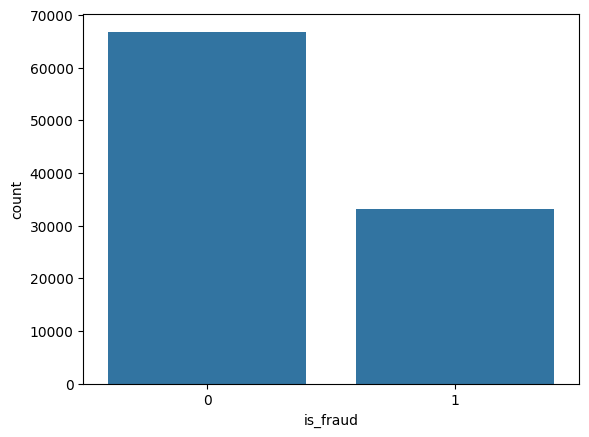

In [56]:
import seaborn as sns
sns.countplot(transaction_df_final, x='is_fraud')

In [57]:
transaction_df_final.to_csv('../Data/Train/transactions.csv', index=False)

## Transaction history data

In [37]:
transaction_history_list = []

for i, transaction in tqdm(transaction_df_final.iterrows()):
    history_id = generate_random_id()
    customer_id = transaction.customer_id
    transaction_id = transaction.transaction_id
    previous_balance = transaction.amount + uniform(0, 10000000)

    if transaction.transaction_type == "depôt":
        new_balance = previous_balance + transaction.amount
    else:
        new_balance = previous_balance - transaction.amount
        
    transaction_date = transaction.transaction_date

    transaction_history_dict = {
        "history_id" : history_id,
        "customer_id" : customer_id,
        "transaction_id" : transaction_id,
        "previous_balance" : previous_balance,
        "new_balance" : new_balance,
        "transaction_date": transaction_date
    }
    transaction_history_list.append(transaction_history_dict)

transaction_history_df = pd.DataFrame(transaction_history_list)
print(transaction_history_df.shape)
transaction_history_df.head()

100000it [00:17, 5696.86it/s]


(100000, 6)


,history_id,customer_id,transaction_id,previous_balance,new_balance,transaction_date
0,758d6613b2e442e0a6f0a62d158f2e79,6712a0a1291743a18b4c006597576467,d6f651199a0845eea6a0342650cf2a74,6.726628e+06,6.736552e+06,2011-12-26
1,4d1c11663f6d45099a9c507e40a9ad6d,31a60799bba6402296e747e2472ea2d7,64a54fcca8b5423ea1541a2554587a5b,5.786273e+06,5.873425e+06,2011-09-07
2,743054ff5339495d92d23b9cc981e1e8,eb5cd6f961eb4033866ffc113dd7b0be,e3a199d691944974825115e3f10dfc31,3.247649e+06,3.266873e+06,2012-10-27
3,ee832f14c3c749738f50036c0b66269a,a0328af98d7f4020809f653add0a13f7,8b0b4efbb94f4778b79a8470f71fa86a,8.525858e+06,8.553978e+06,2011-11-21
4,33eeb5771d7542079c3b09361a726a96,0e9914d7b3224d2d9e4e3ed8ee2e1865,6b99abfcf434433992796ce496ecbd4b,3.782795e+06,3.806346e+06,2013-01-09


In [38]:
transaction_history_df.to_csv('../Data/Train/transaction_history.csv', index=False)

## Transaction pattern data

In [39]:
customer_id_list = customer_df["customer_id"]
print(customer_id_list)

0       7af158b067d44bb4ae2cdf2f89e04492
1       e20b1bb45b2347788c9178d09f5eb613
2       9d66e5ed253a40618e8cbd6d7b004235
3       f56a5aa54c0e4148b9e39e5d7632561e
4       2acfd5ec2600445eae03a3ae89ea0101
                      ...               
9995    96d41498412249f0ba9a56ed2af67197
9996    20525ee986a845888977965665cb93a5
9997    6d241f1b44fd46f581dde1cc4aa3ae22
9998    33d9789409ce40438892778b3b6e88c4
9999    b4d7f1a4a86647e0bbb6f427c2d8b89d
Name: customer_id, Length: 10000, dtype: object


In [40]:
import numpy as np
import pandas as  pd 
import random
from faker import Faker
from uuid import uuid4
from tqdm import tqdm

faker= Faker()

# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer un montant moyen aléatoire
def generate_average_amount():
    return round(random.uniform(5.0, 1000.0), 2)

# Fonction pour générer une fréquence de transactions aléatoire
def generate_frequency():
    return random.randint(1, 30)

# Fonction pour générer une localisation fréquente aléatoire
def generate_most_common_location():
    return faker.city()

# Fonction pour générer un appareil le plus utilisé aléatoire
def generate_most_common_device():
    return random.choice(['mobile', 'tablette'])

# Fonction pour créer une table de transaction patterns
def create_transaction_patterns_table(length=100000):

    transaction_patterns = pd.DataFrame()

    # Les listes
    pattern_id_list = []
    customer_id_list = customer_df["customer_id"].tolist()
    average_amount_list = []
    frequency_list = []
    most_common_location_list = []
    most_common_device_list = []
    foreign_key_list=[]  # liste des cles etrangeres qui seront aleatoirement choisies

    # Générer les valeurs
    for i in tqdm(range(length)):
        pattern_id = create_id()
        customer_id = random.choice(customer_id_list) 
        average_amount = generate_average_amount()
        frequency = generate_frequency()
        most_common_location = generate_most_common_location()
        most_common_device = generate_most_common_device()

        # Ajouter dans les listes
        pattern_id_list.append(pattern_id)
        foreign_key_list.append(customer_id)
        average_amount_list.append(average_amount)
        frequency_list.append(frequency)
        most_common_location_list.append(most_common_location)
        most_common_device_list.append(most_common_device)
    
    # Assigner aux colonnes de la table transaction patterns (en dehors de la boucle)
    transaction_patterns['pattern_id'] = pattern_id_list
    transaction_patterns['customer_id'] = foreign_key_list
    transaction_patterns['average_amount'] = average_amount_list
    transaction_patterns['frequency'] = frequency_list
    transaction_patterns['most_common_location'] = most_common_location_list
    transaction_patterns['most_common_device'] = most_common_device_list

    return transaction_patterns

# Créer une table de transaction patterns
transaction_patterns = create_transaction_patterns_table()

# Afficher les premières lignes de la table transaction patterns
transaction_patterns


100%|██████████| 100000/100000 [00:20<00:00, 4945.40it/s]


,pattern_id,customer_id,average_amount,frequency,most_common_location,most_common_device
0,38d72897-692b-41d5-9ef1-ac18c9f8d991,b459b744f39047bfba066dec185b282b,709.45,13,Berryville,mobile
1,c1dd5b49-2526-4a83-9dca-4665b59c60de,9a70e3d2f4c04ddc92b9b9933e5b6276,447.16,7,Lake Michele,mobile
2,e53c9e0f-03af-499d-8fab-742bc6eced37,bb480bb052cc42a8a4408504c7442293,988.51,10,Valdezborough,tablette
3,abaf663b-84ed-4ecc-98e2-ddc3d4b20244,1b0fd06e36d44cb2a0dd14e341211b72,491.21,30,Lynnstad,tablette
4,557ae22d-2fab-4716-bfdd-d8ecfad18341,0ca256a2c42b4880b0085d74a648c436,404.39,16,Jonathanville,mobile
...,...,...,...,...,...,...
99995,8f5c1c99-db36-42b4-a57c-9c43940eb12e,cf8fdd5b90664a2a8290f53dfb15d24b,604.69,3,Lake Deborahfort,tablette
99996,abd96f99-680d-4d9a-b0fe-791b8c116ac3,a3f07001fbf541ddad2d6ad221df3934,516.65,26,North Kevin,mobile
99997,7f85611c-c89d-4c7b-853f-07bdfdf7138b,f4cb3bc8066742c4a0c60e9c87eb9de2,150.39,19,South Kimberlystad,mobile
99998,4b94ebef-6808-4b37-81d4-264e7cf7d5b6,65d4435dbd73481faf768fa5205a5a83,492.98,11,Fisherville,mobile


In [41]:
transaction_patterns.to_csv('../Data/Train/transaction_patterns.csv', index=False)

## alerts data

In [42]:
# Fonction pour générer un identifiant unique
def create_id():
    return str(uuid4())

# Fonction pour générer une date et heure aléatoire
def generate_alert_date():
    return faker.date_time_between(start_date='-5y', end_date='now')

# Fonction pour générer un type d'alerte aléatoire
def generate_alert_type():
    return random.choice(['suspicious activity', 'large transaction'])

# Fonction pour générer un statut d'alerte aléatoire
def generate_alert_status():
    return random.choice(['open', 'closed'])

# Fonction pour générer une description d'alerte aléatoire
def generate_description():
    return faker.text(max_nb_chars=250)

# Fonction pour créer une table d'alertes
def create_alerts_table(length=100):

    alerts = pd.DataFrame()

    # Les listes
    alert_id_list = []
    transaction_id_list = transaction_df["customer_id"].tolist()
    alert_date_list = []
    alert_type_list = []
    alert_status_list = []
    description_list = []
    foreign_key_alerts_list=[]

    # Générer les valeurs
    for i in tqdm(range(length)):
        alert_id = create_id()
        transaction_id = random.choice(transaction_id_list) # Remplacer par un identifiant de transaction réel si disponible
        alert_date = generate_alert_date()
        alert_type = generate_alert_type()
        alert_status = generate_alert_status()
        description = generate_description()

        # Ajouter dans les listes
        alert_id_list.append(alert_id)
        foreign_key_alerts_list.append(transaction_id)
        alert_date_list.append(alert_date)
        alert_type_list.append(alert_type)
        alert_status_list.append(alert_status)
        description_list.append(description)
    
    # Assigner aux colonnes de la table alerts (en dehors de la boucle)
    alerts['alert_id'] = alert_id_list
    alerts['transaction_id'] = foreign_key_alerts_list
    alerts['alert_date'] = alert_date_list
    alerts['alert_type'] = alert_type_list
    alerts['alert_status'] = alert_status_list
    alerts['description'] = description_list

    return alerts

# Créer une table d'alertes
alerts = create_alerts_table()

# Afficher les premières lignes de la table alerts
alerts

100%|██████████| 100/100 [00:00<00:00, 2786.38it/s]


,alert_id,transaction_id,alert_date,alert_type,alert_status,description
0,998d2814-687f-4438-ada8-f2432a8ff616,68d09a0737974e68a47f1ce7b784eab7,2019-07-31 12:43:19,suspicious activity,closed,Between debate particularly process can. Recei...
1,65f579f1-9d0d-4956-a24c-f3c5f121636e,d3f4a7fdc31e4bc6a65980e1587df94f,2019-10-28 16:18:03,large transaction,open,One hard old today bag. Run should base record...
2,18ad0d9d-ec59-4ae1-93e6-c3b14f69ab0b,95ae2824c5ce41cb8fb787b87df8c816,2023-07-11 16:04:35,suspicious activity,open,Send nearly table nothing model child. Allow o...
3,0404a9ea-0c38-47d9-83ff-db444378ebe4,87f35f6bf3a146c3ab1d9c6c3b2d2690,2020-11-01 17:20:32,suspicious activity,closed,Surface learn serve organization treatment doo...
4,423b8d38-1f61-467e-8559-6ca2d80009b3,56d5e02c5c0349a28773f8f5cd39f725,2020-11-03 15:35:49,large transaction,open,Wish spring imagine material do old. Tonight b...
...,...,...,...,...,...,...
95,4bbc9de7-ebba-449d-9b7e-c022d8555e62,c14df9bd91bb41a5b0a9e091d23a8aa3,2024-03-01 22:04:42,large transaction,open,Small everyone candidate section argue bed som...
96,a9353ff0-a833-43d7-9d06-d8015e422f44,b42905718c1942c1b982875eae4d8b88,2023-01-02 08:00:52,large transaction,closed,Hear others director right. Already analysis f...
97,0a935c82-36c3-4f02-855a-f62abeab181e,00ed154a37b84448ba9086d4a18c0b2f,2022-08-22 05:53:05,suspicious activity,closed,Action life when computer those guess. Decide ...
98,ea2ae431-2bc2-4fea-9a3c-fefc2e73fb28,882177e9d538484eafcb3f1437ff81e3,2019-08-29 18:51:43,suspicious activity,closed,War traditional any board sense investment its...


In [43]:
alerts.to_csv('../Data/Train/alerts.csv', index=False)

## fraude_cases data 

## regions data

In [44]:
from glob import glob

list_data = glob('../Data/Train/*')
print(list_data)


['../Data/Train\\alerts.csv', '../Data/Train\\customers.csv', '../Data/Train\\devices.csv', '../Data/Train\\transactions.csv', '../Data/Train\\transaction_history.csv', '../Data/Train\\transaction_patterns.csv']


In [45]:
import os 
os.sep

'\\'

In [46]:
list_data[0].split(os.sep)[-1].split('.')[0]

'alerts'